# _Проектная работа №2_
# _по предмету "Основы математического моделирования"_
##  _Студентки кафедры квантовой электроники_
## _Брагиной Анны, 327_
## _Задача №3_

### 1. _Постановка задачи:_
Используя метод переменных направлений, решить краевую задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\pi, 0<y<2\pi, t>0\\
& u\big|_{x=0}=u\big|_{x=\pi}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=2\pi}=0\\
& u\big|_{t=0}=sin3xcosy
\end{aligned} \right. \label{eq1}
\end{equation} $$

### 2. _Аналитическое решение задачи_
Будем искать решение задачи в виде:
$$u(x,y,t)=T(t)V(x,y)$$
Тогда, решая исходную задачу методом разделения переменных, получаем:

$$\frac{T'(t)}{T(t)}=\frac{V"(x,y)}{V(x,y)}=-\lambda$$

Имеем две задачи: Задачу Коши и Задачу Штурма-Лиувилля:

$$ \left\{
\begin{aligned}
& T'+\lambda T = 0\\
& T(0)=0
\end{aligned} \right. \label{eq2} \hspace{20pt} \left\{
\begin{aligned}
& V'' +\lambda V = 0\\
& V\big|_{x=0}=V\big|_{x=\pi}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=2\pi}=0
\end{aligned} \right. \label{eq3} $$

Теперь, представляя функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X \big|_{x=0}= X \big|_{x=\pi}\\
\end{aligned} \right.   \Rightarrow X=sin(\sqrt{\nu} x) \hspace{20pt} \left\{
\begin{aligned}
& Y''+\mu Y = 0\\
&  \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=2\pi}=0
\end{aligned} \right. \Rightarrow Y=cos(\sqrt{\mu} y) $$

где  $ \mu =\big{(} \frac{m}{2}\big{)} ^{2}$, $ \nu = n ^{2}$, $\lambda=\mu+\nu$

Тогда для функции $V$ получаем: $V_{nm}=cos(\frac{my}{2})sin(nx)$

Из начальных условий получаем, что $ n=3, m=2 \Rightarrow \lambda =10 $

Тогда, с учетом, что решение представляется в виде: 

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$
 
Получаем решение: $$u(x,y,t)=sin(3x)cos(y)e^{-10t}$$

### 3. _График аналитического решения_
Построим график аналитического решения:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
N, M, T = 200, 200, 200
x_start, x_end = 0, pi
y_start, y_end = 0, 2*pi
t_start, t_end = 0, 1
tau= t_end/ (T-1)
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,T)

In [3]:
u_a = np.zeros((N,M,T))
for n in range(0,N):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=sin(3*x[n])*cos(y[m])*exp(-10*j*tau)

Text(0.5, 0.92, 'График аналитического решения в момент времени t =0.5')

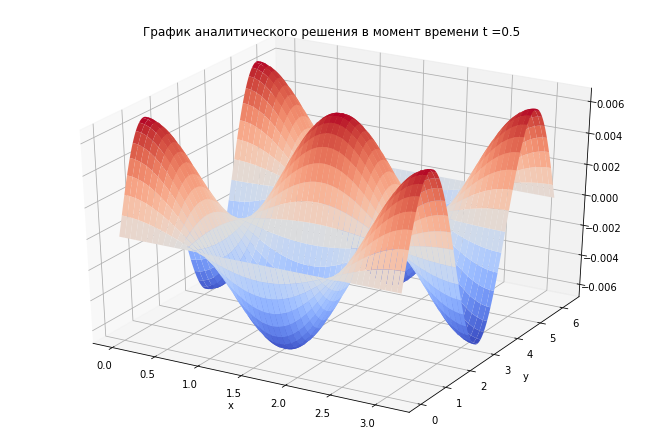

In [4]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)], rstride=4, cstride=4, cmap = cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График аналитического решения в момент времени t =' +str(round(tau*T/2,2)) + '')

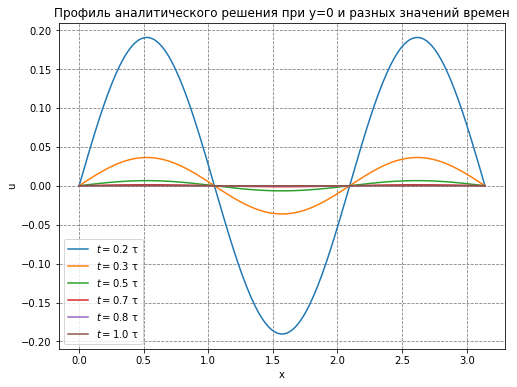

In [5]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

plt.plot(x, u_a[:,0,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Таким образом, можно видеть, что с течением времени перенос тепла будет уменьшаться. Причем скорость уменьшения определяется экспоненциальным множетилем, а форма изменяться не будет  и определяется множителями синусом и косинусом.

## _Численное решение_

###  4. _Схема переменных направлений_
Для применения схемы введем в рассчетной области двумерную пространственную и одномерную временную сетку:
$$  \left. 
\begin{aligned}
& x_{n}=nh_{x}, n=\overline{0,N-1}, Nh_{x}=\pi \\
&  y_{m}=-\frac{h_{y}}{2}+mh_{y}, m=\overline{0,M-1}, Mh_{y}=2\pi\\
&  t_{j}=j\tau, j=\overline{0,J-1}, J\tau=T\\
\end{aligned} \right. $$
где $h_{x}$, $h_{y}$ и $\tau $ - шаги по координатам $x$,$y$ и $t$ соответственно.
С учетом того, что по переменной $y$ мы имеем условия Неймана на обоих границах, будем  рассматривать фиктивные узлы в окрестности этих границ.

Далее заменим дифференциальные операторы $\dfrac{\partial^2 }{\partial x^2}$ и $\dfrac{\partial^2 }{\partial y^2}$ их разностными аналогами:

$$  \left. 
\begin{aligned}
&  \Lambda_{1}u=\frac{u_{n-1,m}-2u_{n,m}+u{n+1,m}}{h_{x}^{2}}\\
&  \Lambda_{2}u=\frac{u_{n,m-1}-2u_{n,m}+u{n,m+1}}{h_{y}^{2}}
\end{aligned} \right. $$
 Где используется обозначение $u_{n,m}=u(x_{n},y_{m},t_{j})$. Решение разностной задачи будем обозначать функцией $\omega$.
 
 Таким образом, мы сделали переход от дифференциальной задачи к разностной следующим образом:

$$ L\omega \rightarrow \Lambda_{1}\omega +\Lambda_{2}\omega $$
 
 Для решения нашей задачи введем полуцелые слои, каждый из которых расположен между целыми значениями $j$ $j+1$. Расстояния между целыми и полуцелыми слоями, соответственно, равны $\frac{\tau}{2}$.
 
В данной задаче мы будем рассматривать схему переменных направлений, являющейся объединением явной и неявной схемы.При переходе со слоя $j$ на $j+\frac{1}{2}$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $j+\frac{1}{2}$ на следующий целый слой $j+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$.
 
Таким образом, получаем разностную задачу в виде:
$$\begin{equation}
 \left\{
\begin{aligned}
&  \frac{\omega^{j+\frac{1}{2}}_{n,m}-\omega^{j}_{n,m}}{0.5 \tau}= \Lambda_{1}\omega^{j+1}_{n,m}+\Lambda_{2}\omega_{n,m}^{j+1} +f^{j+\frac{1}{2}}\\
&  \frac{\omega^{j+1}_{n,m}-\omega^{j+\frac{1}{2}}_{n,m}}{0.5 \tau}=\Lambda_{1}\omega^{j+1}_{n,m}+\Lambda_{2}\omega_{n,m}^{j+1} +f^{j+\frac{1}{2}}\\
\end{aligned} \right. \label{eq6}
\end{equation} $$

где в силу отсутствия неоднородности в правой части исходной задачи $f=0$ и будет отброшена в дальнейшем.

Таким образом, рассматривая первое уравнение системы и добавляя к нему граничные условия по $x$, то для каждого из фиксированных значениях $y_{m}$ полученное уравнение можно решить методом прогонки.\

Далее, зная значения функции на полуцелых слоях, дополним второе из уравнений системы граничными условиями по $y$ и аналогично первому случаю, решим для каждого из фиксированных значениях $x_{n}$ систему методом прогонки.

Начальные условия нашей задачи аппроксимируются точно:
$$ \omega^{0}_{n,m} = 0 , n= \overline{0,N}, m=\overline{0,M} $$
Причем в силу однородности начальных условий в задаче, данные условия применимы и для полуцелых слоев.

Граничные условия аппроксимируются на каждом временном  слое $j$ следующим образом:
$$  \left. 
\begin{aligned}
&  \omega_{0,m}^{j}= \omega_{N,m}^{j} = 0 , m=\overline{0,M} \\
&  \frac{\omega^{j}_{n,1}-\omega^{j}_{n,0}}{h_{y}}=  \frac{\omega^{j}_{n,M}-\omega^{j}_{n,N-1}}{h_{y}}=0, n= \overline{0,N}
\end{aligned} \right. $$

При этом условия Дирихле аппроксимируются точно, а условия Неймана за счет выбора сетки аппроксимируются со вторым порядком погрешности аппроксимации, так как
соответствующие разностные первые производные оказываются центральными относительно точек $y = 0$ и $y = 2\pi$.

Таким образом, переписывая операторы в явном виде и проделывая некоторые математические преобразования, получаем следующее:

$$\begin{equation}
 \left\{
\begin{aligned}
& 0.5 \gamma_{1} \omega^{j+0.5}_{n-1,m}-(1+\gamma_{1}) \omega^{j+0.5}_{n,m} + 0.5\gamma_{1} \omega^{j+0.5}_{n+1,m} = -\underbrace{\bigg{(}(1-\gamma_{2}) \omega^{j}_{n,m}+ 0.5\gamma_{2}(\omega^{j}_{n,m-1}+\omega^{j}_{n,m+1})\bigg{)}}_{F_{n}^{x}}, m=\overline{1,M-1} \\
& 0.5 \gamma_{2} \omega^{j+1}_{n,m-1}-(1+\gamma_{2}) \omega^{j+1}_{n,m} + 0.5\gamma_{2} \omega^{j+1}_{n,m+1} = -\underbrace{\bigg{(}(1-\gamma_{1}) \omega^{j+0.5}_{n,m}+ 0.5\gamma_{1}(\omega^{j+0.5}_{n-1,m}+\omega^{j+0.5}_{n+1,m})\bigg{)}}_{F_{m}^{y}}, n=\overline{1,N-1} \\
\end{aligned} \right. \label{eq7}
\end{equation}$$

Где $\gamma_{1} = \frac{\tau}{h_{x}}$, $\gamma_{2} = \frac{\tau}{h_{y}}$.

Таким образом, если ввести коэффициенты $A_{x} = C_{X} = 0.5\gamma_{1}$, $B_{x}= 1-\gamma_{1}$ и  $A_{y} = C_{y} = 0.5\gamma_{2}$, $B_{y}= 1-\gamma_{2}$, То получим системы уравнений, которые можно решить методом прогонки.

### 5. _Метод прогонки_
Метод прогонки, используемый в данной задаче, основывается на решение линейных систем с трехдиагональной матрицей.
Рассмотрим систему:
$$\begin{equation}
 \left\{
\begin{aligned}
& -c_{0}y_{0}+b_{0}y_{1} = -f_{0}\\
& a_{i}y_{i-1} - c_{i}y_{i}+b_{i}y_{i+1} = -f_{i}, i=\overline{1,N-1}\\
& a_{N}y_{N-1} - c_{N}y_{N} = -f_{N}
\end{aligned} \right. \label{eq8}
\end{equation}$$

Если $c_{0}\neq{0}$, то выразим первый элемент системы: $y_{0}=\alpha_{0}y_{1}+\beta_{0}$, где $\alpha_{0}=\frac{b_{0}}{c_{0}}$, $\beta_{0}=\frac{f_{0}}{c_{0}}$, 
Подставим $y_{0}$ во второе уравнение и найдем связь между $y_{1}$ и $y_{2}$. Данный процесс мы можем продолжать рекурентно, получая, таким образом, следующую систему:

$$\begin{equation}
 \left\{
\begin{aligned}
& y_{i}=\alpha_{i+1}y_{i+1}+\beta_{i+1}, i=\overline{0,N-1}\\
& y_{N} = \beta_{N}
\end{aligned} \right. \label{eq9}
\end{equation}$$

Именно с помощью этой системы мы осуществляем **прямой ход прогонки** - нахождение коэффициентов системы по следующим формулам:
$$ \alpha_{i}=\frac{b_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

$$ \beta_{i}=\frac{f_{i}+a_{i} \beta_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

В задаче мы будем использовать метод прогонки дважды, соответственно, используя равенства  $a_{i}=A_{x}$ $b_{i}=B_{x}$ $c_{i}=C_{x}$ при прогонке по $x$ и $a_{i}=A_{y}$ $b_{i}=B_{y}$ $c_{i}=C_{y}$  при прогонке по $y$.

Затем, по найденным коэффициентам, мы можем найти значения функции $y_{i}$ по методу **обратной прогонки**.

### 6. _Програмная реализация численного решения_

In [6]:
h_x=x_end/(N-1)
h_y=y_end/(M-2)
tau= t_end/ T
gamma_1 = tau / (h_x**2)
gamma_2 = tau / (h_y**2)

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start-h_y/2,y_end+h_y/2,M) 
t = np.linspace(t_start,t_end,T) 
u=np.zeros((N,M,2*T+1)) 

for n in range(0,N):              
    for m in range(0,M):
        u[n,m,0]=sin(3*x[n])*cos(y[m])

In [7]:
def progonka_X(m,j):
    alpha=np.zeros(N)     # последний эллемент имеет индекс N-1        
    beta = np.zeros(N)
    alpha[1] = 0    
    beta[1] = 0
    A_x = 0.5 * gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5 * gamma_1
    
    u[0,m,j]= 0
    for n in range (1,N-1): # прямая прогонка 
        F_x = 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1] # проверить индексы по j
        alpha[n+1] = C_x / (B_x - A_x * alpha[n])
        beta[n+1] = (F_x + A_x * beta[n]) / (B_x-A_x * alpha[n])

    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):   # обратная прогонка               
        u[n-1,m,j]=alpha[n] * u[n,m,j] + beta[n] 

In [8]:
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1] = 1
    beta[1] = 0
    A_y = 0.5 * gamma_2
    B_y= 1 + gamma_2
    C_y= 0.5 * gamma_2
    for m in range (1,M-1): # прямая прогонка
        F_y = 0.5 *gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
        alpha[m+1] = C_y / (B_y - A_y * alpha[m])  
        beta[m+1] = (F_y + A_y * beta[m]) / (B_y-A_y * alpha[m])
    
    u[n,M-1,j]=beta[-1]/(1-alpha[-1]) # обратная прогонка
    for m in range(M-1,0,-1):                  
        u[n,m-1,j]=alpha[m] * u[n,m,j] + beta[m] 

In [9]:
for j in range(1,2*T+1,2):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0

Text(0.5, 0.92, 'График численного решения в момент времени t =0.5')

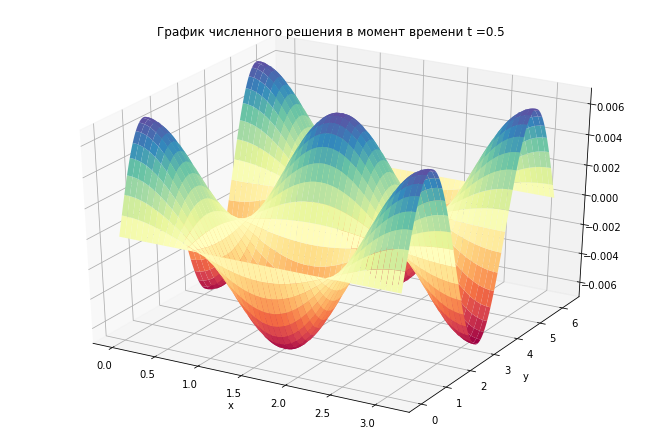

In [10]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u[:,:,int(T)], rstride=4, cstride=4, cmap = cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График численного решения в момент времени t =' +str(round(tau*T/2,2)) + '')
#ax.view_init(0,90)

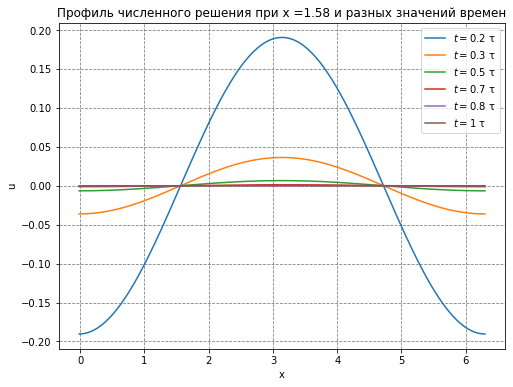

In [11]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль численного решения при x =' +str(round(h_x*N/2,2)) + ' и разных значений времен')

plt.plot(y, u_a[int(N/2),:,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(y, u_a[int(N/2),:,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(y, u_a[int(N/2),:,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(y, u_a[int(N/2),:,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(y, u_a[int(N/2),:,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(y, u_a[int(N/2),:,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Как видно, у численного решения, также, каки у аналитического, наблюдается тенденция уменьшения с течением времени.

### 7. _Погрешность_

Text(0.5, 0.92, 'График Погрешности при t =0.5')

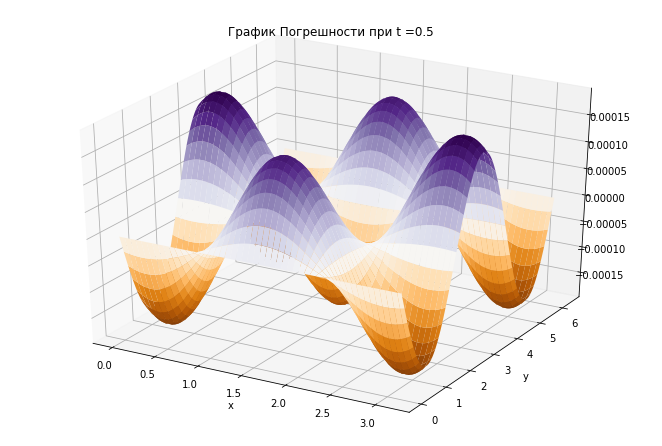

In [12]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)]-u[:,:,int(T)], rstride=4, cstride=4, cmap = cm.PuOr)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График Погрешности при t =' +str(round(tau*T/2,2)) + '')